**This is a test for a public Jupyter Notebook.**

In [18]:
# Load the following python packages
import numpy as np
from matplotlib import pyplot as plt
# make plots appear within the notebook
%matplotlib inline

**Solving simple ODEs using Python**

Consider the double integrator
\begin{align}
    \tfrac{\mathrm{d}}{\mathrm{d}t} x(t) = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} x(t) + \begin{pmatrix} 0 \\ 1 \end{pmatrix} u(t) \quad x(0) = x^0
\end{align}

<class 'list'>


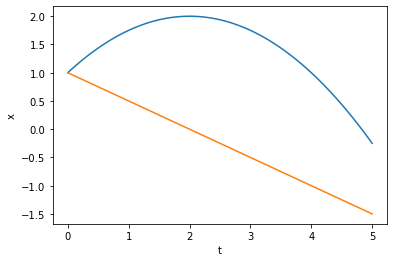

In [107]:
from scipy.integrate import odeint

# define system dynamics f(x,u) = Ax + Bu
def rhs(x, t):
    return [x[1], -0.5]

# sanity check
t0 = [0]
x0 = [1, 1]
u  = [-1]
#pint(rhs(t0,x0))

# time discretization
ts = np.linspace(0, 5, 100)

# intial value
x0 = [1, 1] 
print(type(x0))

# solve ODE (with constant control u)
xs = odeint(rhs, x0, ts)

plt.xlabel("t")
plt.ylabel("x")
plt.plot(ts,xs[:,0])
plt.plot(ts,xs[:,1])
